In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline
import sys
print(sys.version)
import matplotlib as mpl
import requests
import io
import scipy
# Update the matplotlib configuration parameters:
mpl.rcParams.update({'font.size': 18, 'font.family': 'serif', 'xtick.major.pad' : 5, 'ytick.major.pad' : 5})

import seaborn as sns 
sns.set_theme()

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
# Load Dataset

#data=pd.read_csv('Data.csv')
#data.head()
# Loading our data in its raw form

urlGam = "https://drive.google.com/uc?export=download&id=1TvbbCV-kJeNMuIORMyiMFgH_u_CQSZhX" # Make sure the url is the raw version of the file on GitHub
downloadGam = requests.get(urlGam).content
GamRaw = pd.read_csv(io.StringIO(downloadGam.decode('utf-8')))

urlNeut = "https://drive.google.com/uc?export=download&id=1bY6ZPF3WLxfviYSSViuw1SEx1_sWxP46" # Make sure the url is the raw version of the file on GitHub
downloadNeut = requests.get(urlNeut).content
NeutRaw = pd.read_csv(io.StringIO(downloadNeut.decode('utf-8')))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(GamRaw)
scaledGam = scaler.transform(GamRaw)
GamNormal = pd.DataFrame(scaledGam, columns=GamRaw.columns)
GamNormal.shape

(43360, 11)

In [ ]:
scaler.fit(NeutRaw)
scaledNeut = scaler.transform(NeutRaw)
NeutNormal = pd.DataFrame(scaledNeut, columns=NeutRaw.columns)
NeutNormal.head()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,0.28,0.51,0.05,0.05,0.00,0.07,1.00,1.00,0.85,0.03,0.68
1,0.51,0.64,0.13,0.22,0.00,0.07,0.34,0.92,0.89,0.03,0.88
2,0.12,0.46,0.36,0.36,0.20,0.25,0.48,0.82,0.87,0.02,0.80
3,0.52,0.51,0.24,0.29,0.20,0.13,0.45,0.74,0.73,0.06,0.91
4,0.61,0.26,0.19,0.22,0.00,0.19,0.92,0.69,0.88,0.01,0.94


In [ ]:
GamNormal["distinction"] = 0
NeutNormal["distinction"] = 1

plotFrame = pd.concat([GamNormal, NeutNormal])
plotFrame= plotFrame.sample(frac=1)
plotFrame.head(20)

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom,distinction
2338,0.60,0.95,0.11,0.08,0.00,0.14,0.95,0.89,0.95,0.01,0.41,1
35269,0.90,0.60,0.24,0.31,0.00,0.15,0.38,0.90,0.84,0.01,0.97,1
33667,0.52,0.78,0.66,0.46,0.00,0.61,0.74,0.94,0.97,0.00,0.29,0
10650,0.73,0.62,0.44,0.41,0.00,0.26,0.37,0.94,0.96,0.00,0.27,0
8702,0.67,0.32,0.32,0.28,0.00,0.26,0.62,0.95,0.95,0.00,0.73,0
40174,0.27,0.88,0.31,0.35,0.00,0.22,0.52,0.95,0.96,0.01,0.25,0
12502,0.74,0.15,0.20,0.19,0.00,0.10,0.33,0.93,0.88,0.06,0.78,1
31498,0.84,0.20,0.40,0.39,0.00,0.30,0.55,0.94,0.95,0.00,0.55,0
5969,0.24,0.77,0.46,0.37,0.00,0.36,0.59,0.95,0.95,0.01,0.38,0
8961,0.18,0.84,0.23,0.28,0.00,0.21,0.74,0.95,0.94,0.00,0.84,0


In [ ]:
# Statical summary

plotFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Th,"86,872.00",0.47,0.28,0.00,0.22,0.45,0.70,1.00
Ph,"86,872.00",0.50,0.29,0.00,0.25,0.50,0.75,1.00
E,"86,872.00",0.37,0.26,0.00,0.16,0.31,0.56,1.00
NrHits,"86,872.00",0.31,0.16,0.00,0.19,0.31,0.43,1.00
NrBumps,"86,872.00",0.01,0.06,0.00,0.00,0.00,0.00,1.00
E1,"86,872.00",0.29,0.22,0.00,0.11,0.22,0.43,1.00
E1E9,"86,872.00",0.58,0.20,0.00,0.42,0.60,0.75,1.00
E9E25,"86,872.00",0.88,0.13,0.00,0.86,0.94,0.96,1.00
Z20,"86,872.00",0.88,0.17,0.00,0.87,0.94,0.96,1.00
Z53,"86,872.00",0.03,0.06,0.00,0.00,0.01,0.02,1.00


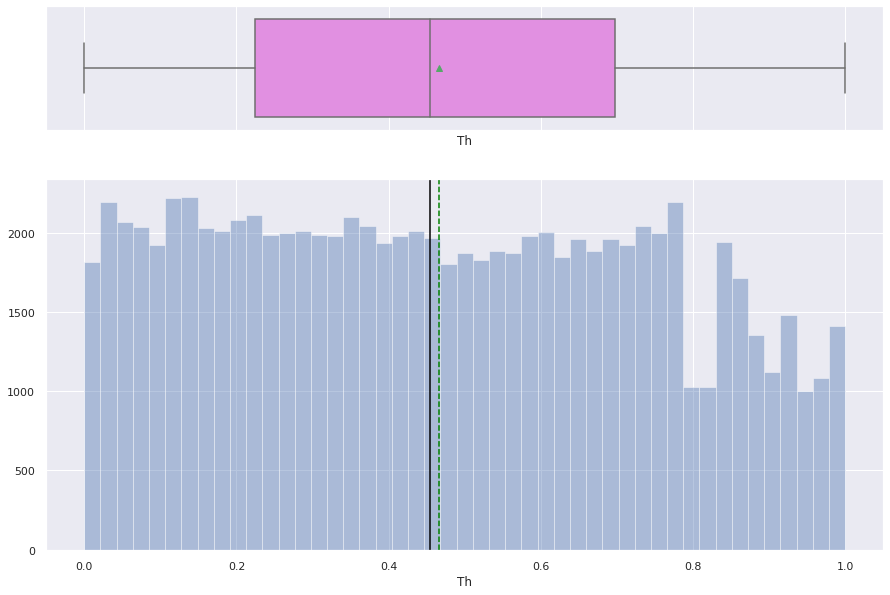

In [ ]:
histogram_boxplot(plotFrame['Th'])

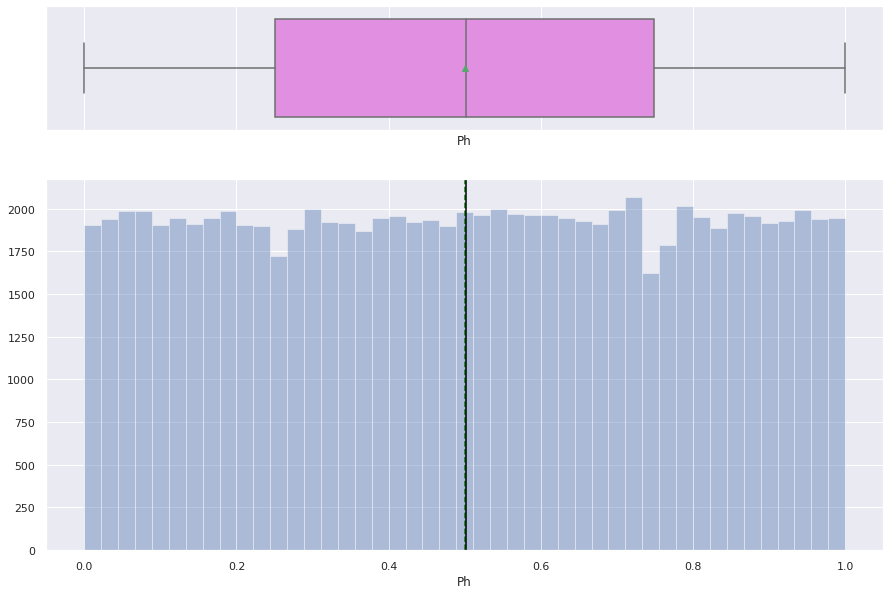

In [ ]:
histogram_boxplot(plotFrame['Ph'])

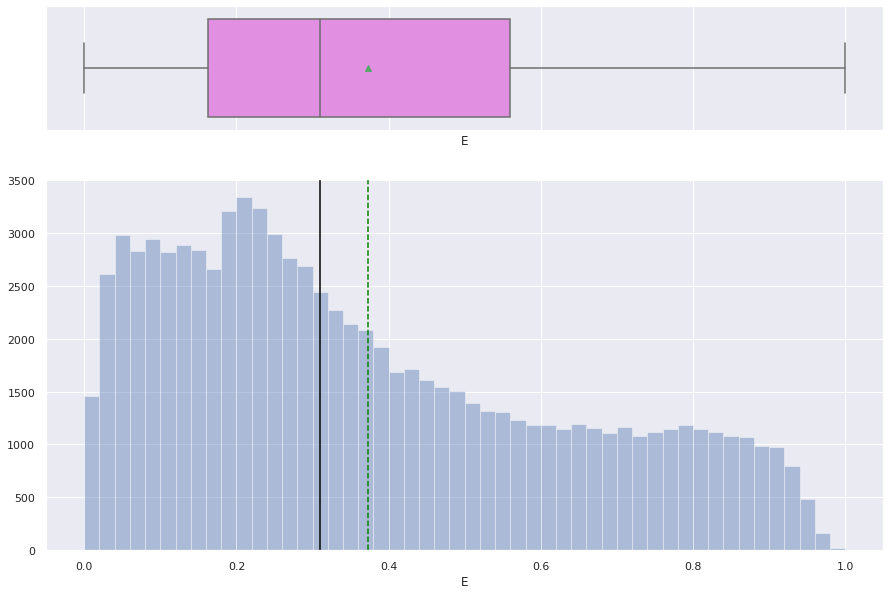

In [ ]:
histogram_boxplot(plotFrame['E'])

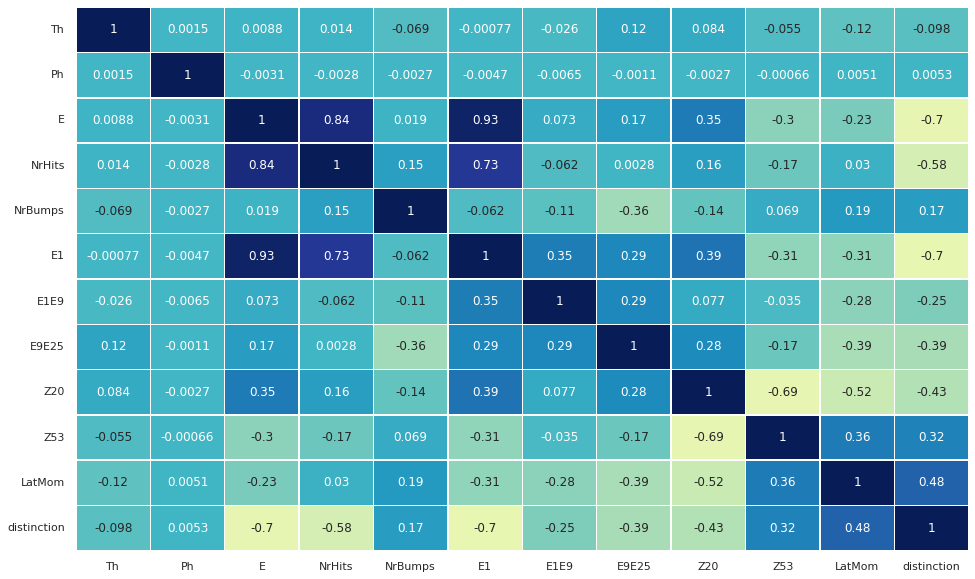

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(plotFrame.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
#sns.pairplot(plotFrame, hue='Distindtion');

In [ ]:
# Separating features and the target column
X = plotFrame.drop('distinction', axis=1)
y = plotFrame['distinction']

In [ ]:
# Splitting the data into train and test sets in 50:50 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((43436, 11), (43436, 11))

In [ ]:
# Keep only names of features by removing the name of target variable

column_names = list(X.columns)                   
feature_names = column_names
print(feature_names)

['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom']


In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
#Train the random forest classifier
rf_classifier=RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

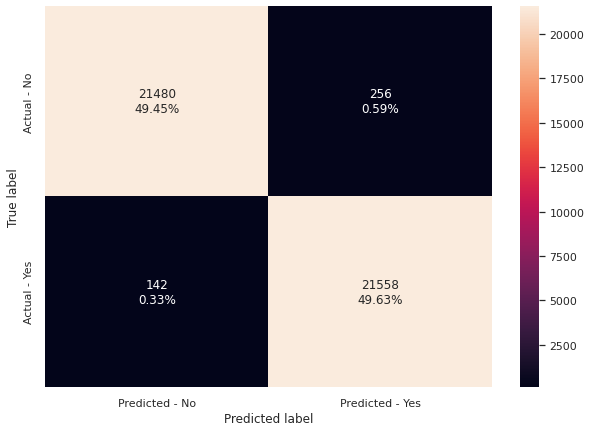

In [ ]:
make_confusion_matrix(rf_classifier,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_classifier_score=get_metrics_score(rf_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  0.9908370936550327
Recall on training set :  1.0
Recall on test set :  0.9934562211981567
Precision on training set :  1.0
Precision on test set :  0.9882644173466582


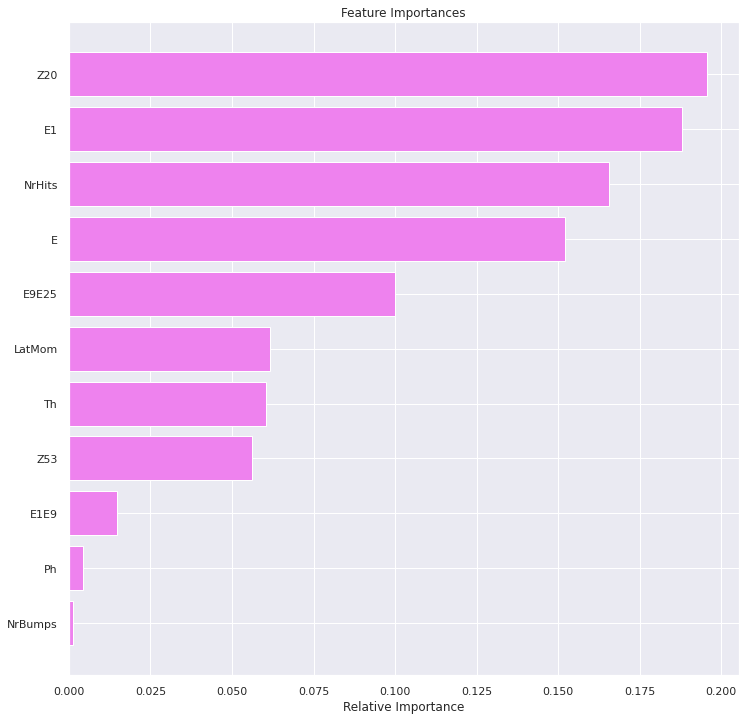

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
X = plotFrame.drop(['Z53','NrBumps','E9E25','Ph', 'Th', 'LatMom','E1E9'], axis=1)

In [ ]:
# Splitting the data into train and test sets in 50:50 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, shuffle=True)

In [ ]:
#Train the random forest classifier
rf_classifier=RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

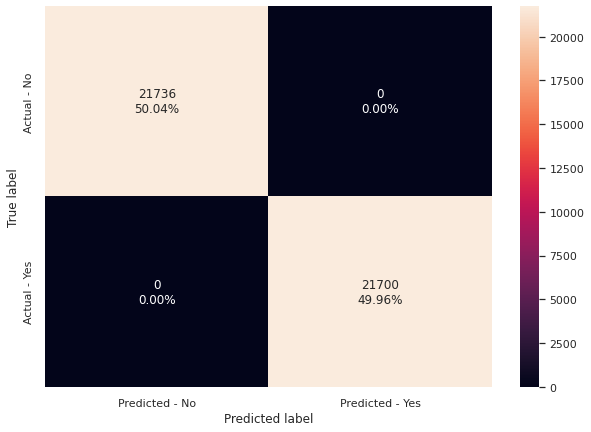

In [ ]:
make_confusion_matrix(rf_classifier,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_classifier_score=get_metrics_score(rf_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
